## **Importar bibliotecas**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## **Ler imagens**

In [23]:
def input_image(img_path, is_gray=False):
   img = cv2.imread(img_path)
   img_new = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if is_gray else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
   return img_new

In [66]:
img_gray1 = input_image(os.path.join("..", "Imagens", "Cameraman.jpg"), is_gray=True)

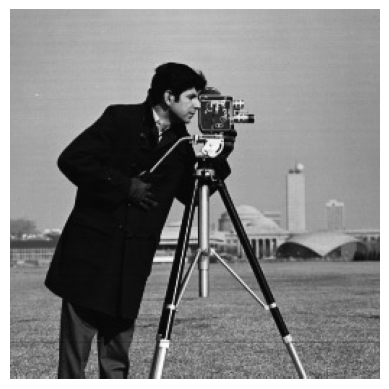

In [67]:
plt.imshow(img_gray1, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

## Vizinhança

\begin{bmatrix}
(x-1,y-1) & (x-1,y) & (x-1,y+1)\\
(x, y-1) & \textbf{(x, y)} & (x, y+1) \\
(x+1, y-1) & (x+1,y) & (x+1, y+1)
\end{bmatrix}

In [68]:
img_gray1.shape

(256, 256)

In [69]:
m, n = img_gray1.shape[0]//2, img_gray1.shape[1]//2

In [ ]:
print(m)
print(n)

128
128


In [78]:
viz_5x5 = img_gray1[0:5, 0:5]
viz_5x5

array([[156, 157, 157, 157, 157],
       [158, 158, 158, 158, 158],
       [158, 158, 157, 157, 157],
       [157, 156, 157, 157, 158],
       [156, 155, 156, 158, 159]], dtype=uint8)

In [79]:
viz_5x5.shape

(5, 5)

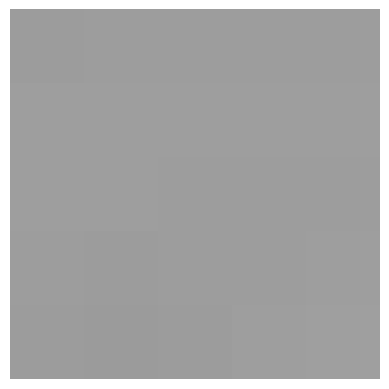

In [92]:
plt.imshow(viz_5x5, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [89]:
viz1_5x5 = img_gray1[m:m+5, n:m+5]
viz1_5x5

array([[ 19,  11,  15,  69,  91],
       [ 15,  17,  15,  70,  87],
       [ 13,  25,  17,  72,  86],
       [ 14,  27,  17,  73,  91],
       [ 13,  20,  15,  71, 101]], dtype=uint8)

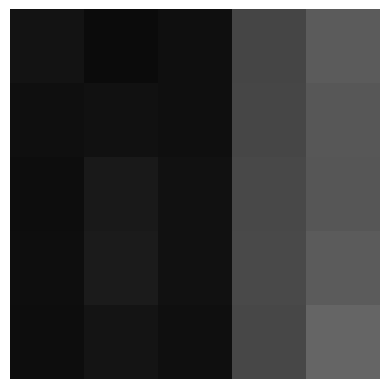

In [91]:
plt.imshow(viz1_5x5, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

### Padding

In [39]:
#preencher a borda da imagem -- constante
img_pad1 = np.pad(img_gray, pad_width=(2,2))

In [40]:
img_pad1.shape

(260, 260)

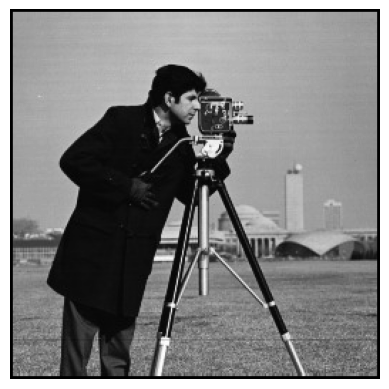

In [41]:
plt.imshow(img_pad1, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [44]:
#preencher a borda da imagem -- edge
img_pad2 = np.pad(img_gray, pad_width=(2,2), mode="edge")

In [45]:
img_pad2.shape

(260, 260)

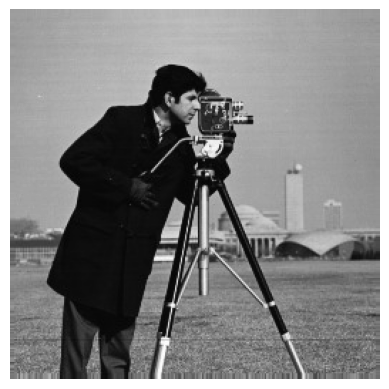

In [47]:
plt.imshow(img_pad2, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [51]:
#preencher a borda da imagem -- reflect
img_pad3 = np.pad(img_gray1, pad_width=(10,10), mode="reflect")

In [53]:
img_pad3.shape

(276, 276)

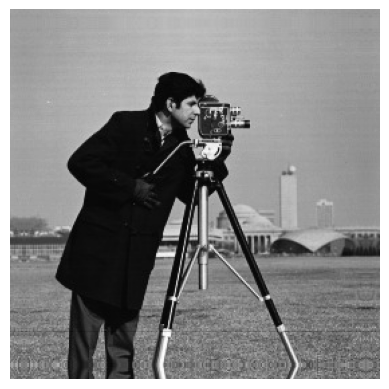

In [54]:
plt.imshow(img_pad3, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

## Convolução

$R = w_1 x_1 + w_2 x_2 + ... + w_n x_n = \sum_{i=1}^{n} w_i x_i$

Sendo $w$ uma máscara genérica, o exemplo de uma máscara $w$:

Para uma imagem $f(x,y)$ a convolução gera uma imagem $g(x,y)$

$g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) f(x-s,y-t)$

In [31]:
w = np.array([[1, 0, -1], 
              [2, 1, -2], 
              [1, 0, -1]])
w

array([[ 1,  0, -1],
       [ 2,  1, -2],
       [ 1,  0, -1]])

In [55]:
w = np.array([[ 0, -1,  0], 
              [-1,  4, -1], 
              [ 0, -1,  0]])
w

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

**Algoritmo de convolução de definido da seguinte forma:**

In [56]:
def conv(f, w):
    '''
        Função que executa a convolução em uma imagem
        params:
            - f: (np.array) imagem de entrada
            - w: mascara de convolução
        return:
            - imagem g com convolução
    '''
    #Coleta a largura e altura da imagem
    N, M = f.shape #(Y, X)
    #Coleta a largura e altura da máscara w
    n, m = w.shape
    # coleta dos parametros a e b da mascara
    a = int((n-1)/2)
    b = int((m-1)/2)
    #cria uma imagem g similar a f
    g = np.empty_like(f)
    #processo de convolução da image 
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = np.sum(np.multiply(w, f[x-a: x+a+1, y-b:y+b+1]))
    
    return g.astype(np.uint8)

In [57]:
img_gray = input_image(os.path.join("..", "Imagens", "parttern.png"), is_gray=True)

In [58]:
conv_img = conv(img_gray, w)

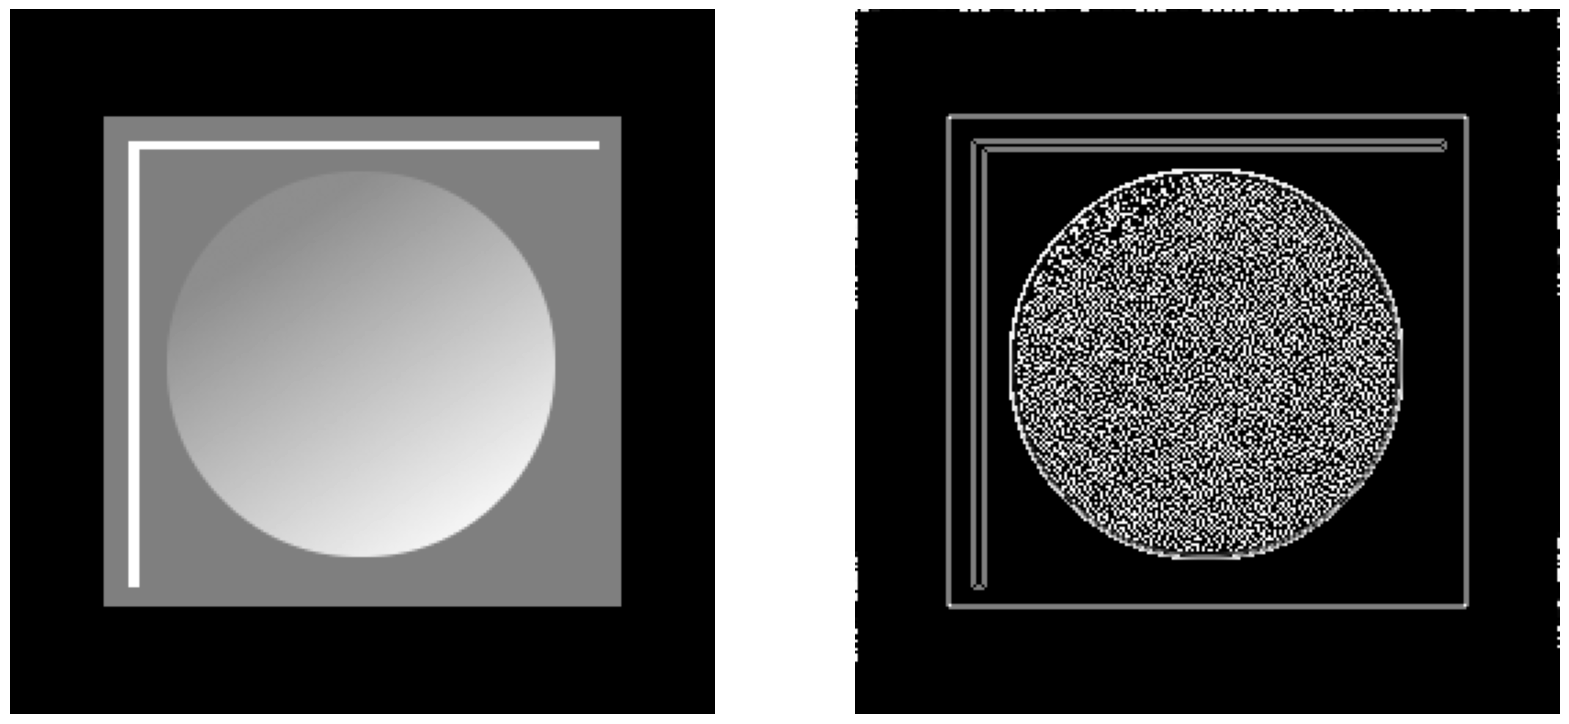

In [59]:
plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(conv_img,vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

## Filtros de suaviazação

In [54]:
img_gray = input_image(os.path.join("..", "Imagens", "Moon.jpg"), is_gray=True)

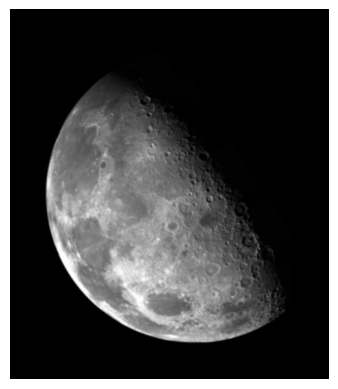

In [55]:
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [56]:
wa = (1/9)*np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])
wa

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [59]:
conv_imga = conv(img_gray, wa)

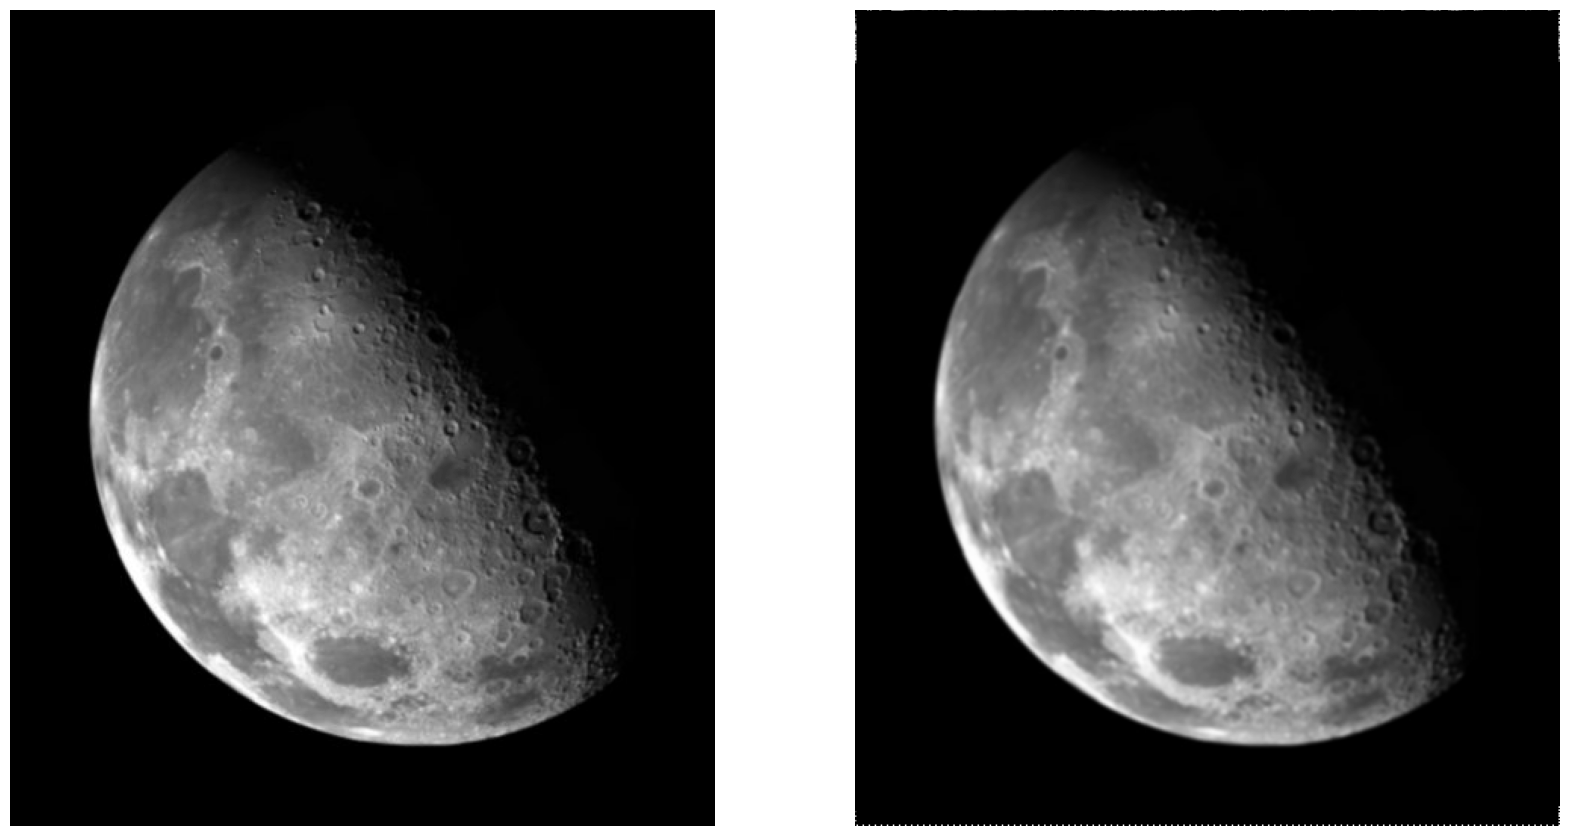

In [60]:
plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(conv_imga, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()